# Google Analytics Customer Revenue

## 1. Imports

### Import Libraries

In [ ]:
import sys
import os

import numpy as np # Arrays
import pandas as pd # Series and Dataframes

import matplotlib.pyplot as plt
import seaborn as sns # Advanced Plotting
from google.colab import files


pd.options.display.max_rows = 100
plt.style.use('ggplot') # Beautify Plots

In [ ]:
from pandas import json_normalize
from scipy import stats
from datetime import datetime
from sklearn import model_selection
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#import lightgbm as lgb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Data

In [ ]:
file_dir = '/content/drive/MyDrive/DS/DS0424/' #your path to the csv
file_name = 'df_clean_final.csv'

In [ ]:
%%time
df = pd.read_csv(file_dir+file_name, dtype={'fullVisitorId': 'str'})

CPU times: user 5.57 s, sys: 729 ms, total: 6.3 s
Wall time: 10.2 s


## 2. Data Understanding - EDA

### 2.1 Analisis univariante

#### 2.1.1 Tamaño del dataset



In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270850 entries, 0 to 270849
Columns: 37 entries, Unnamed: 0.2 to totals.transactionRevenue
dtypes: bool(1), float64(3), int64(7), object(26)
memory usage: 74.6+ MB


#### 2.1.2 Visualización directa datos

In [ ]:
df.head().T

,0,1,2,3,4
Unnamed: 0.2,0,1,2,3,4
Unnamed: 0.1,0,1,2,3,4
Unnamed: 0,1,2,3,7,9
channelGrouping,Organic Search,Organic Search,Organic Search,Organic Search,Organic Search
fullVisitorId,377306020877927890,3895546263509774583,4763447161404445595,537222803633850821,9499785259412240342
sessionId,377306020877927890_1472880147,3895546263509774583_1472865386,4763447161404445595_1472881213,537222803633850821_1472812602,9499785259412240342_1472812272
socialEngagementType,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged
visitId,1472880147,1472865386,1472881213,1472812602,1472812272
visitNumber,1,1,1,1,1
visitStartTime,1472880147,1472865386,1472881213,1472812602,1472812272


df.set_index('sessionId', inplace=True)

In [ ]:
df = df.loc[:,~df.columns.str.contains('Unnamed')].copy()

In [ ]:
df.head(2).T

,0,1
channelGrouping,Organic Search,Organic Search
fullVisitorId,377306020877927890,3895546263509774583
sessionId,377306020877927890_1472880147,3895546263509774583_1472865386
socialEngagementType,Not Socially Engaged,Not Socially Engaged
visitId,1472880147,1472865386
visitNumber,1,1
visitStartTime,1472880147,1472865386
device.browser,Firefox,Chrome
device.browserVersion,not available in demo dataset,not available in demo dataset
device.browserSize,not available in demo dataset,not available in demo dataset


In [ ]:
### Borramos ids
df_ids = ['fullVisitorId', 'visitId']
df.drop(df_ids, axis=1, inplace=True)

#### 2.1.3 Tipos de atributos disponibles , 2.1.4 Estadisticos descriptivos y 2.1.5. Numero de valores nulos

In [ ]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
visitNumber,270850.0,2.243275e+00,8.912507e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.930000e+02
visitStartTime,270850.0,1.485001e+09,9.014480e+06,1.470035e+09,1.477564e+09,1.483927e+09,1.492743e+09,1.501657e+09
totals.visits,270850.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
totals.bounces,135326.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
totals.newVisits,210508.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
totals.transactionRevenue,3427.0,1.382343e+08,5.648006e+08,4.000000e+04,2.448500e+07,4.822000e+07,1.059300e+08,2.312950e+10


In [ ]:
df.describe(exclude=np.number).T

,count,unique,top,freq
channelGrouping,270850,8,Organic Search,114313
sessionId,270850,270774,4491333099755680268_1476946205,2
socialEngagementType,270850,1,Not Socially Engaged,270850
device.browser,270850,37,Chrome,186001
device.browserVersion,270850,1,not available in demo dataset,270850
device.browserSize,270850,1,not available in demo dataset,270850
device.operatingSystemVersion,270850,1,not available in demo dataset,270850
device.isMobile,270850,2,False,199280
device.mobileDeviceBranding,270850,1,not available in demo dataset,270850
device.mobileDeviceModel,270850,1,not available in demo dataset,270850


#### 3.1.4 *Eliminación de atributos de baja varianza

Para mayor facilidad de lectura procedemos a realizar una primera limpieza de los atributos con 0 varianza

In [ ]:
# constant_columns = []
# for column in df.columns:
#        constant_columns.append(column)
#    if df[column].nunique() == 1:

In [ ]:
constant_columns = [column for column in df.columns if df[column].nunique(dropna = False) == 1]

In [ ]:
constant_columns

['socialEngagementType',
 'device.browserVersion',
 'device.browserSize',
 'device.operatingSystemVersion',
 'device.mobileDeviceBranding',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.flashVersion',
 'device.language',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits']

In [ ]:
df.drop(constant_columns, axis=1, inplace=True)

In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270850 entries, 0 to 270849
Columns: 14 entries, channelGrouping to totals.transactionRevenue
dtypes: bool(1), float64(3), int64(2), object(8)
memory usage: 27.1+ MB


In [ ]:
df.head(2).T

,0,1
channelGrouping,Organic Search,Organic Search
sessionId,377306020877927890_1472880147,3895546263509774583_1472865386
visitNumber,1,1
visitStartTime,1472880147,1472865386
device.browser,Firefox,Chrome
device.isMobile,False,False
device.deviceCategory,desktop,desktop
geoNetwork.continent,Oceania,Europe
geoNetwork.subContinent,Australasia,Southern Europe
geoNetwork.country,Australia,Spain


In [ ]:
df_description = df.describe(include='all').T

In [ ]:
### descanso

#### 2.1.6 Target Analysis

In [ ]:
TARGET = 'totals.transactionRevenue'

In [ ]:
#1. es object
#2. no tiene bien decimales
#3. tiene nulos

In [ ]:
df[TARGET].describe()

count    3.427000e+03
mean     1.382343e+08
std      5.648006e+08
min      4.000000e+04
25%      2.448500e+07
50%      4.822000e+07
75%      1.059300e+08
max      2.312950e+10
Name: totals.transactionRevenue, dtype: float64

In [ ]:
df[TARGET].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: totals.transactionRevenue, dtype: float64

In [ ]:
df[df[TARGET].notnull()][TARGET].head(20)

259       8380000.0
277      81500000.0
288      63840000.0
289      43710000.0
295      35390000.0
302      33670000.0
305     103240000.0
317      25680000.0
803     593910000.0
967      10990000.0
989      30720000.0
992      11960000.0
1001    179160000.0
1003     80760000.0
1004     30390000.0
1006    259370000.0
1007     38350000.0
1010     53560000.0
1011     31980000.0
1013    264790000.0
Name: totals.transactionRevenue, dtype: float64

In [ ]:
df[TARGET] = df[TARGET].astype(float)

In [ ]:
df[TARGET].describe()

count    3.427000e+03
mean     1.382343e+08
std      5.648006e+08
min      4.000000e+04
25%      2.448500e+07
50%      4.822000e+07
75%      1.059300e+08
max      2.312950e+10
Name: totals.transactionRevenue, dtype: float64

In [ ]:
df[TARGET].fillna(0.0, inplace=True)

In [ ]:
df[TARGET].describe()

count    2.708500e+05
mean     1.749045e+06
std      6.537418e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name: totals.transactionRevenue, dtype: float64

In [ ]:
df[TARGET] = df[TARGET] / 1000000

In [ ]:
df[TARGET].describe()

count    270850.000000
mean          1.749045
std          65.374181
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       23129.500000
Name: totals.transactionRevenue, dtype: float64

In [ ]:
df[df[TARGET]>0][TARGET].describe()

count     3427.000000
mean       138.234292
std        564.800590
min          0.040000
25%         24.485000
50%         48.220000
75%        105.930000
max      23129.500000
Name: totals.transactionRevenue, dtype: float64

In [ ]:

df['visitWithTransaction'] = (df[TARGET] > 0).astype(int)

In [ ]:
df.head().T

,0,1,2,3,4
channelGrouping,Organic Search,Organic Search,Organic Search,Organic Search,Organic Search
sessionId,377306020877927890_1472880147,3895546263509774583_1472865386,4763447161404445595_1472881213,537222803633850821_1472812602,9499785259412240342_1472812272
visitNumber,1,1,1,1,1
visitStartTime,1472880147,1472865386,1472881213,1472812602,1472812272
device.browser,Firefox,Chrome,UC Browser,Chrome,Firefox
device.isMobile,False,False,False,False,False
device.deviceCategory,desktop,desktop,desktop,desktop,desktop
geoNetwork.continent,Oceania,Europe,Asia,Oceania,Europe
geoNetwork.subContinent,Australasia,Southern Europe,Southeast Asia,Australasia,Western Europe
geoNetwork.country,Australia,Spain,Indonesia,Australia,Netherlands


In [ ]:
df['visitWithTransaction'].sum()

3427

In [ ]:
df['visitWithTransaction'].mean() * 100

1.2652759830164297

In [ ]:
print('De las {} visitas, hay {} con compras, lo que significa que el {} por ciento de las visitas tienen compra'.format(
    df['visitWithTransaction'].count(),
    df['visitWithTransaction'].sum(),
    df['visitWithTransaction'].mean() * 100
))

De las 270850 visitas, hay 3427 con compras, lo que significa que el 1.2652759830164297 por ciento de las visitas tienen compra


<ipython-input-38-0174b64b732a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='totals.transactionRevenue', ylabel='Density'>

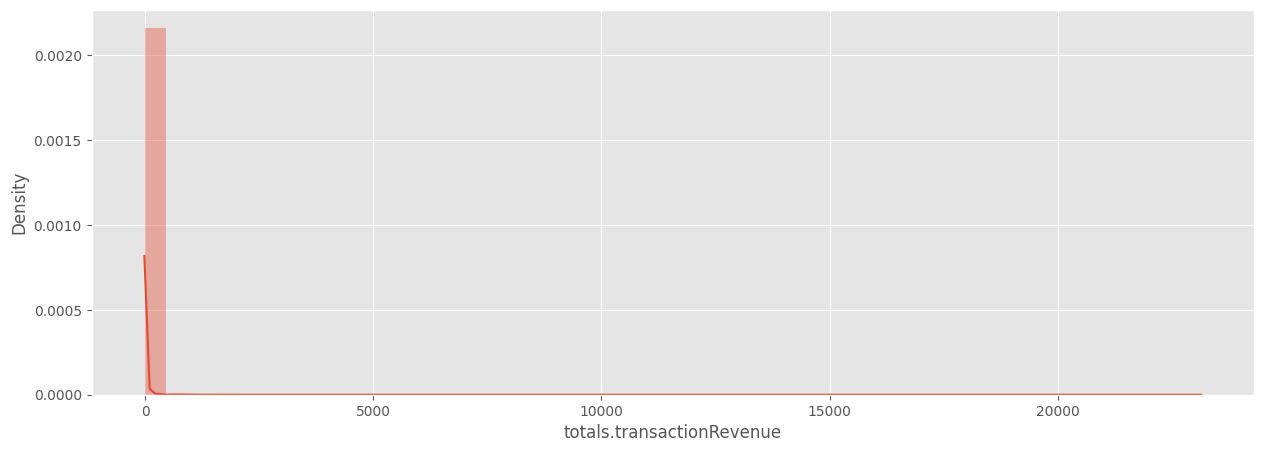

In [ ]:
# Distribución de la variable target al completo
plt.figure(figsize=(15, 5))
sns.distplot(
    df[TARGET]
)

<ipython-input-39-ab25b10eb93b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='totals.transactionRevenue', ylabel='Density'>

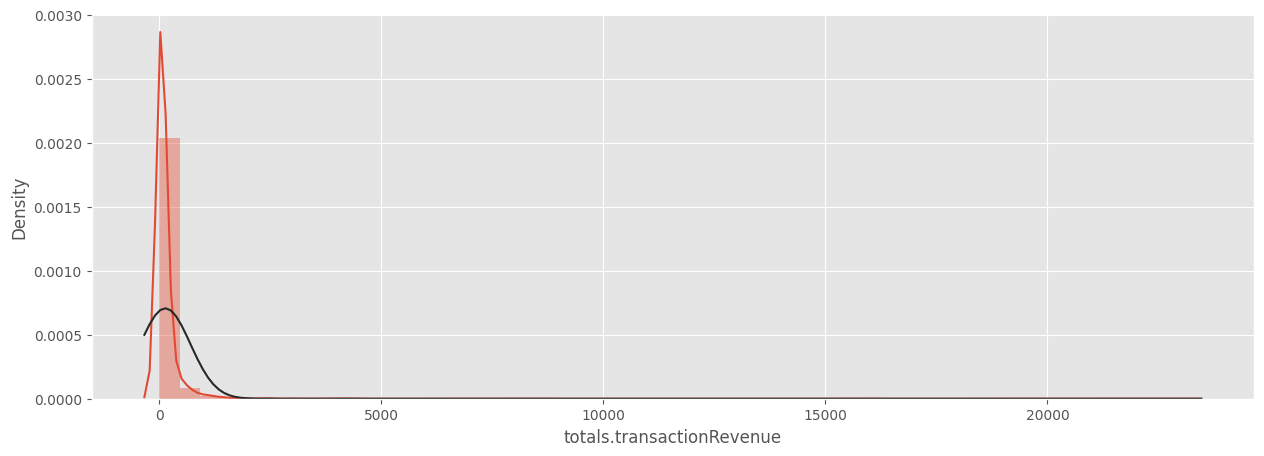

In [ ]:
# Distribución de la variable target al completo
plt.figure(figsize=(15, 5))
sns.distplot(
    df[df['visitWithTransaction'] == 1][TARGET],
    fit = stats.norm
)

In [ ]:
df['totals.transactionRevenue'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: totals.transactionRevenue, dtype: float64

In [ ]:
df['totals.transactionRevenueLN'] = df['totals.transactionRevenue'].apply(lambda x: np.log1p(x))

In [ ]:
TARGET_LN = 'totals.transactionRevenueLN'

<ipython-input-45-cad29b8c7d30>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='totals.transactionRevenueLN', ylabel='Density'>

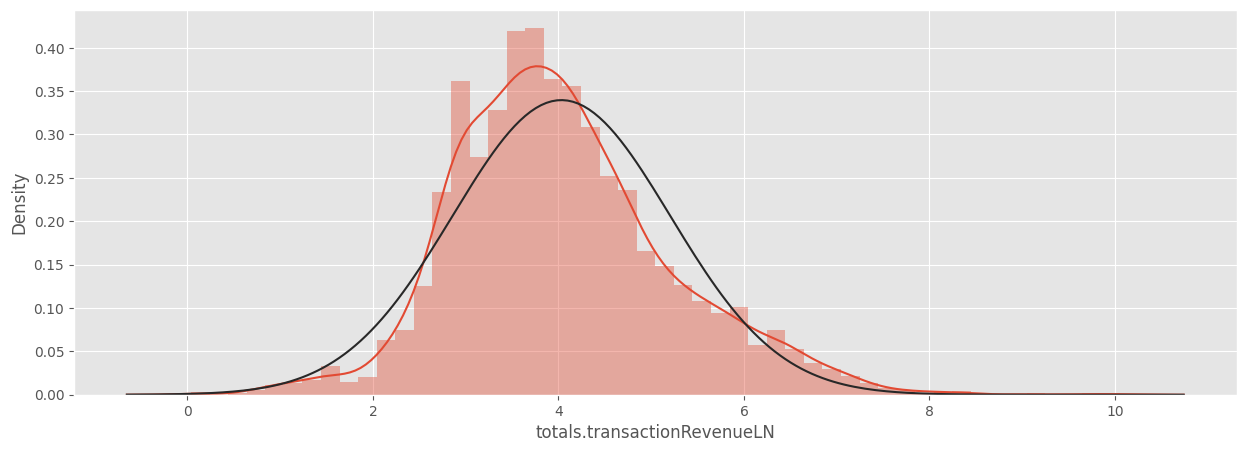

In [ ]:
# Distribución de la variable target transformada al completo
plt.figure(figsize=(15, 5))
sns.distplot(
    df[df['visitWithTransaction'] == 1][TARGET_LN],
    fit = stats.norm
)

#### 2.1.9 a 2.1.11 Analisis variables con el target

In [ ]:
df_description.to_csv('df_description.csv')

In [ ]:
files.download('df_description.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Variables categóricas

###### Device - Device Browser

In [ ]:
df['device.browser'].describe()

count     270850
unique        37
top       Chrome
freq      186001
Name: device.browser, dtype: object

In [ ]:
top_browsers = df['device.browser'].value_counts().head(5)

In [ ]:
top_browsers

device.browser
Chrome               186001
Safari                54676
Firefox               11052
Internet Explorer      5838
Edge                   3030
Name: count, dtype: int64

In [ ]:
top_browsers_list = top_browsers.index.to_list()

In [ ]:
top_browsers_list

['Chrome', 'Safari', 'Firefox', 'Internet Explorer', 'Edge']

In [ ]:
top_browsers_list.append('Others')

In [ ]:
top_browsers_list

['Chrome', 'Safari', 'Firefox', 'Internet Explorer', 'Edge', 'Others']

In [ ]:
df['device.browser'] = pd.Categorical(df['device.browser'], categories=top_browsers_list)

In [ ]:
df['device.browser'].value_counts(dropna=False)

device.browser
Chrome               186001
Safari                54676
Firefox               11052
NaN                   10253
Internet Explorer      5838
Edge                   3030
Others                    0
Name: count, dtype: int64

In [ ]:
df['device.browser'].fillna('Others', inplace=True)

In [ ]:
df['device.browser'].describe()

count     270850
unique         6
top       Chrome
freq      186001
Name: device.browser, dtype: object

In [ ]:
df['device.browser'].value_counts(dropna=False)

device.browser
Chrome               186001
Safari                54676
Firefox               11052
Others                10253
Internet Explorer      5838
Edge                   3030
Name: count, dtype: int64

In [ ]:
df['device.browser'].value_counts(normalize=True, dropna=False)

device.browser
Chrome               0.686731
Safari               0.201868
Firefox              0.040805
Others               0.037855
Internet Explorer    0.021554
Edge                 0.011187
Name: proportion, dtype: float64

In [ ]:
df[df['visitWithTransaction'] == 1].pivot_table(index='device.browser', values=TARGET_LN, aggfunc=[len, np.mean])

,len,mean
,totals.transactionRevenueLN,totals.transactionRevenueLN
device.browser,,
Chrome,3086,4.080423
Safari,232,3.514756
Firefox,52,4.048546
Internet Explorer,29,3.544182
Edge,20,3.472438
Others,8,3.330516


In [ ]:
_results_df = df[df['visitWithTransaction'] == 1].pivot_table(index='device.browser', values=TARGET_LN, aggfunc=[len, np.mean])

In [ ]:
_results_df.columns = ['transactions', 'mean_revenue_ln']

In [ ]:
_results_df.head()

,transactions,mean_revenue_ln
device.browser,,
Chrome,3086,4.080423
Safari,232,3.514756
Firefox,52,4.048546
Internet Explorer,29,3.544182
Edge,20,3.472438


In [ ]:
_results_df['n_rows'] = df['device.browser'].value_counts(dropna=False)

In [ ]:
_results_df.head()

,transactions,mean_revenue_ln,n_rows
device.browser,,,
Chrome,3086,4.080423,186001
Safari,232,3.514756,54676
Firefox,52,4.048546,11052
Internet Explorer,29,3.544182,5838
Edge,20,3.472438,3030


In [ ]:
_results_df['pct_rows'] = df['device.browser'].value_counts(normalize=True, dropna=False)

In [ ]:
_results_df.head()

,transactions,mean_revenue_ln,n_rows,pct_rows
device.browser,,,,
Chrome,3086,4.080423,186001,0.686731
Safari,232,3.514756,54676,0.201868
Firefox,52,4.048546,11052,0.040805
Internet Explorer,29,3.544182,5838,0.021554
Edge,20,3.472438,3030,0.011187


In [ ]:
_results_df['pct_transactions'] = _results_df['transactions'] / _results_df['n_rows']

In [ ]:
_results_df.head()

,transactions,mean_revenue_ln,n_rows,pct_rows,pct_transactions
device.browser,,,,,
Chrome,3086,4.080423,186001,0.686731,0.016591
Safari,232,3.514756,54676,0.201868,0.004243
Firefox,52,4.048546,11052,0.040805,0.004705
Internet Explorer,29,3.544182,5838,0.021554,0.004967
Edge,20,3.472438,3030,0.011187,0.006601


In [ ]:
_results_df = _results_df[['n_rows', 'pct_rows', 'transactions', 'pct_transactions', 'mean_revenue_ln']]

In [ ]:
_results_df

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln
device.browser,,,,,
Chrome,186001,0.686731,3086,0.016591,4.080423
Safari,54676,0.201868,232,0.004243,3.514756
Firefox,11052,0.040805,52,0.004705,4.048546
Internet Explorer,5838,0.021554,29,0.004967,3.544182
Edge,3030,0.011187,20,0.006601,3.472438
Others,10253,0.037855,8,0.000780,3.330516


<Axes: xlabel='device.browser', ylabel='count'>

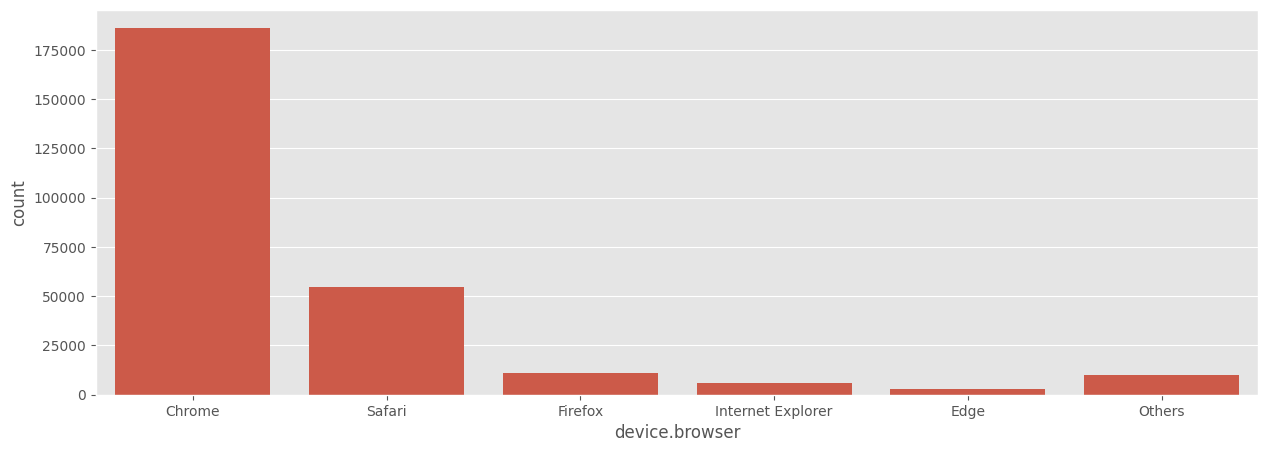

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(
    data = df, x= 'device.browser'
)

<Axes: xlabel='device.browser', ylabel='totals.transactionRevenueLN'>

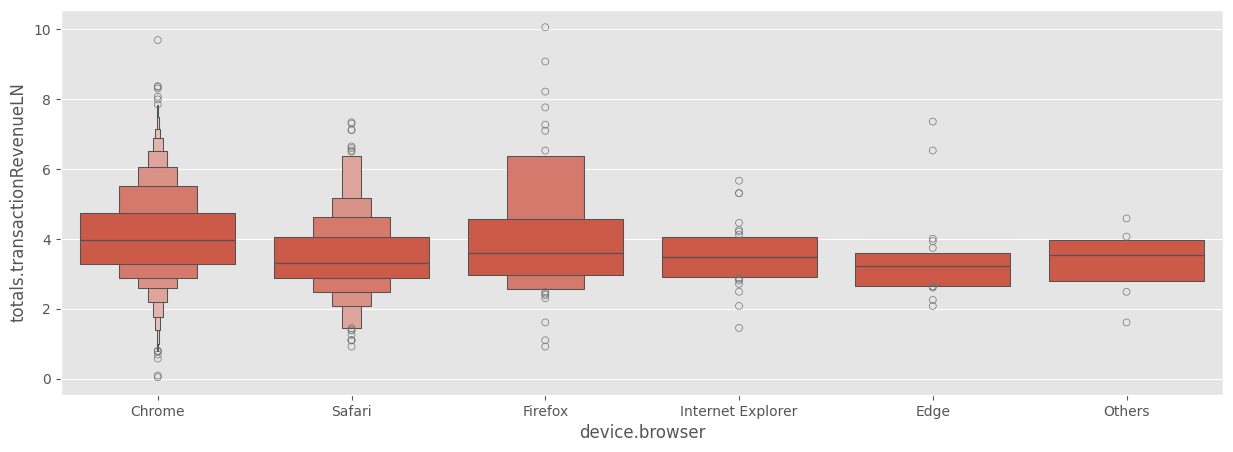

In [ ]:
plt.figure(figsize=(15,5))
sns.boxenplot(
    data = df[df['visitWithTransaction'] == 1],
    x = 'device.browser',
    y = TARGET_LN
)

In [ ]:
def plot_cat_values(dataframe, column, target_column):
    plt.figure(figsize=(15,8))
    #en una única grafica de 2x1 en el primer slot
    ax1 = plt.subplot(2,1,1)
    ## Graficamos el conteo de cada uno de los valores
    ax1 = sns.countplot(
        data = dataframe, x = column,
        order = list(dataframe[column].unique())
    )
    ax2 = plt.subplot(2,1,2) # share ax1 para que me pinte el axis en el mismo orden
    ## Graficamos la distribución del target sólo para aquellos casos con target > 0 (para que no se chafe el BP)
    ax2 = sns.boxenplot(
        data = dataframe[dataframe[target_column] > 0],
        x = column,
        y = target_column,
        order = list(dataframe[column].unique())
    )
    plt.show()


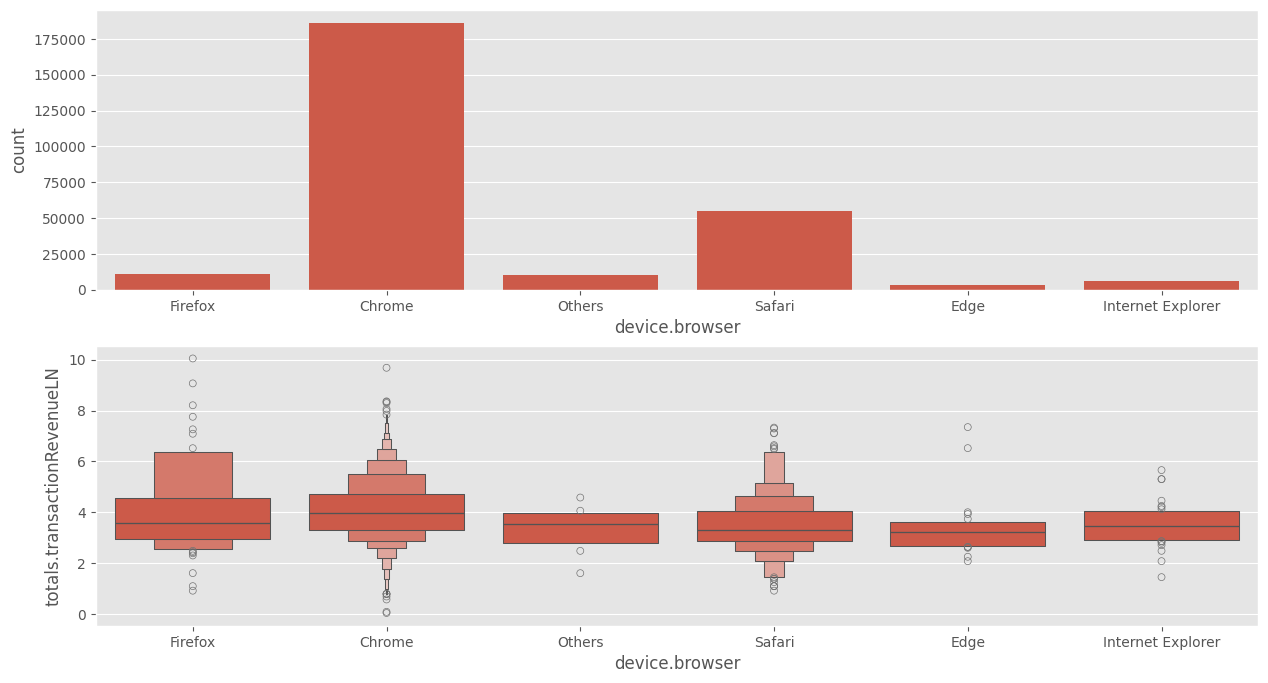

In [ ]:
plot_cat_values(df, 'device.browser', TARGET_LN)

In [ ]:
def explore_cat_values(dataframe, column, target_column):
    _results_df = dataframe[dataframe[target_column] > 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean,lambda x: np.percentile(x, 50) ,lambda x: np.percentile(x, 25) ,lambda x: np.percentile(x, 75)])
    _results_df.columns = ['transactions', 'mean_revenue_ln','median_value','25pct_value','75pct_value']
    _results_df['n_rows'] = dataframe[column].value_counts(dropna=False)
    _results_df['pct_rows'] = dataframe[column].value_counts(normalize=True, dropna=False)
    _results_df['pct_transactions'] = _results_df['transactions'] / _results_df['n_rows']
    _results_df = _results_df[['n_rows', 'pct_rows', 'transactions', 'pct_transactions', 'mean_revenue_ln','25pct_value','median_value','75pct_value']]
    return round(_results_df,3)

In [ ]:
explore_cat_values(df, 'device.browser', TARGET_LN)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
device.browser,,,,,,,,
Chrome,186001,0.687,3073,0.017,4.095,3.295,3.970,4.727
Safari,54676,0.202,231,0.004,3.526,2.890,3.314,4.043
Firefox,11052,0.041,51,0.005,4.110,2.995,3.607,4.574
Internet Explorer,5838,0.022,29,0.005,3.544,2.916,3.464,4.043
Edge,3030,0.011,20,0.007,3.472,2.654,3.218,3.600
Others,10253,0.038,8,0.001,3.331,2.788,3.548,3.964


In [ ]:
def setOthers(dataframe, column, num_values):
    top_categories = dataframe[column].value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append('Others')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    return dataframe[column].fillna('Others')

In [ ]:
##### 18.50

###### Device - Is Mobile

In [ ]:
explore_cat_values(df, 'device.isMobile', TARGET_LN)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
device.isMobile,,,,,,,,
False,199280,0.736,3131,0.016,4.104,3.292,3.970,4.727
True,71570,0.264,281,0.004,3.403,2.890,3.295,3.997


Se observa que en Desktop se hace compra en un mayor porcentaje de ocasiones y el importe es más alto

In [ ]:
df['device.isMobile'].dtype

dtype('bool')

In [ ]:
df['device.isMobile'] = df['device.isMobile'].astype(int)

In [ ]:
df['device.isMobile'].dtype

dtype('int64')

###### Device - Category

In [ ]:
explore_cat_values(df, 'device.deviceCategory', TARGET_LN)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
device.deviceCategory,,,,,,,,
desktop,199269,0.736,3131,0.016,4.104,3.292,3.970,4.727
mobile,62541,0.231,241,0.004,3.351,2.753,3.258,3.932
tablet,9040,0.033,40,0.004,3.716,3.135,3.434,4.413


In [ ]:
device_tab = pd.crosstab(df['device.isMobile'], df['device.deviceCategory'])

In [ ]:
device_tab

device.deviceCategory,desktop,mobile,tablet
device.isMobile,,,
0,199239,38,3
1,30,62503,9037


In [ ]:
df.shape[0]

270850

In [ ]:
prob_desktop = (device_tab.iloc[0,0] + device_tab.iloc[1,0]) / df.shape[0]

In [ ]:
prob_isMobile = (device_tab.iloc[1,0] + device_tab.iloc[1,1]+ device_tab.iloc[1,2]) / df.shape[0]

In [ ]:
prob_desktop*prob_isMobile*df.shape[0]

52655.27904744324

In [ ]:
from scipy.stats import chi2_contingency
stat, p_value, dof, expected = chi2_contingency(device_tab)

In [ ]:
p_value

0.0

In [ ]:
expected

array([[146613.72095256,  46015.02853978,   6651.25050766],
       [ 52655.27904744,  16525.97146022,   2388.74949234]])

###### ChannelGrouping

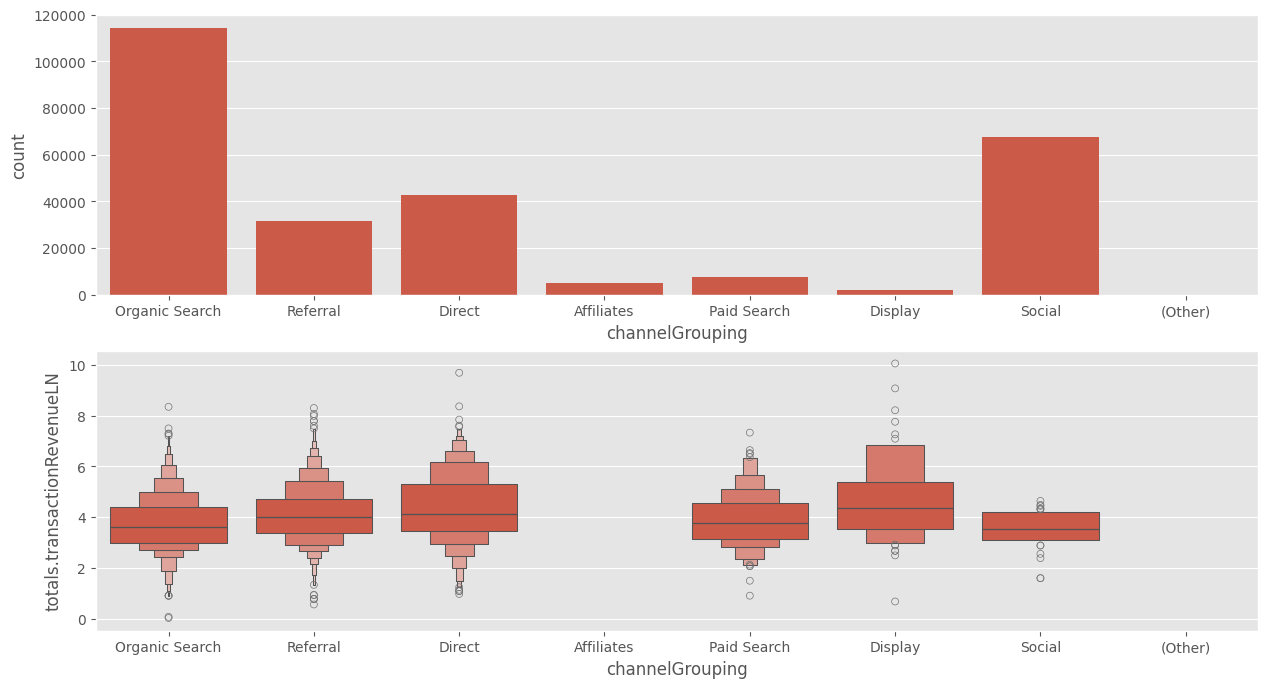

In [ ]:
plot_cat_values(df, 'channelGrouping', TARGET_LN)

In [ ]:
explore_cat_values(df, 'channelGrouping', TARGET_LN)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
channelGrouping,,,,,,,,
Direct,42746,0.158,583,0.014,4.335,3.446,4.111,5.290
Display,1912,0.007,43,0.022,4.780,3.566,4.379,5.391
Organic Search,114313,0.422,1054,0.009,3.766,2.995,3.624,4.397
Paid Search,7662,0.028,139,0.018,3.888,3.156,3.761,4.577
Referral,31490,0.116,1568,0.050,4.129,3.396,4.023,4.725
Social,67780,0.250,25,0.000,3.522,3.090,3.544,4.222


###### GeoNetwork - Continent

In [ ]:
explore_cat_values(df, 'geoNetwork.continent', TARGET_LN)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
geoNetwork.continent,,,,,,,,
Africa,4461,0.016,2,0.000,7.547,7.520,7.547,7.574
Americas,134742,0.497,3346,0.025,4.041,3.245,3.899,4.674
Asia,67195,0.248,37,0.001,4.251,3.496,4.043,4.853
Europe,59398,0.219,23,0.000,4.140,3.325,4.043,4.617
Oceania,4601,0.017,4,0.001,4.580,3.870,4.252,4.962


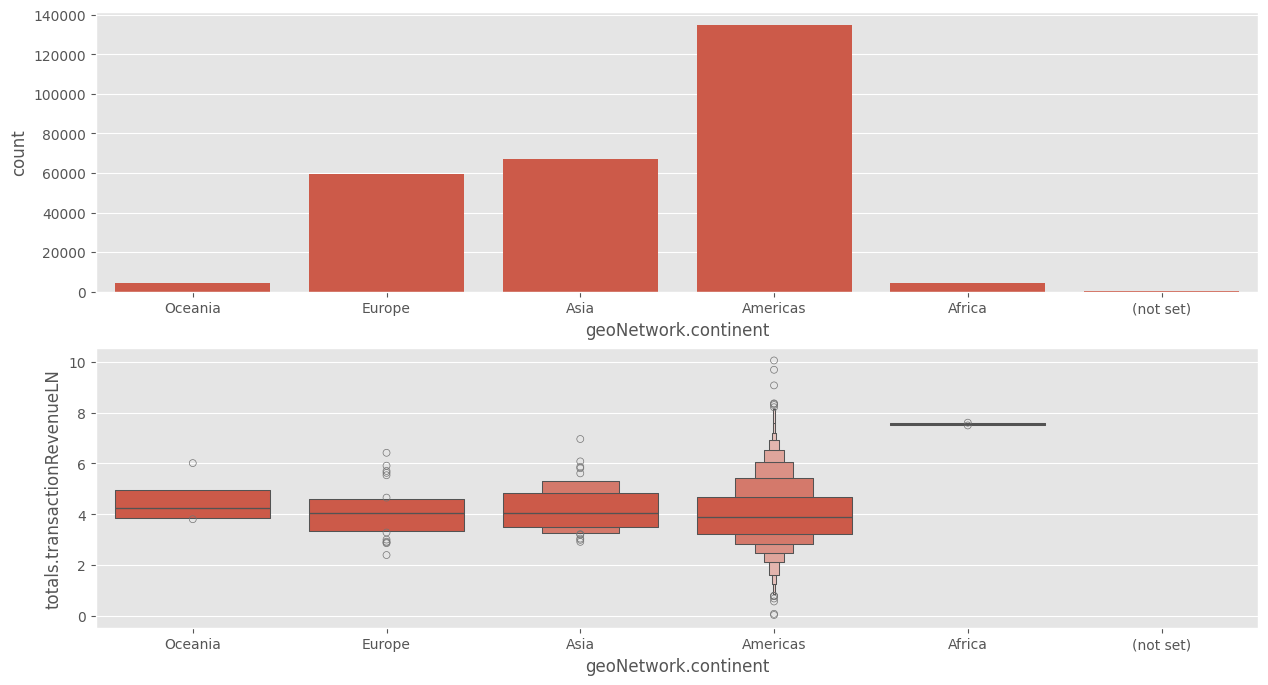

In [ ]:
plot_cat_values(df, 'geoNetwork.continent', TARGET_LN)

###### GeoNetwork - SubContinent

In [ ]:
explore_cat_values(df, 'geoNetwork.subContinent', TARGET_LN)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
geoNetwork.subContinent,,,,,,,,
Australasia,4565,0.017,4,0.001,4.580,3.870,4.252,4.962
Caribbean,745,0.003,7,0.009,3.758,3.114,3.793,4.079
Central America,4772,0.018,4,0.001,3.614,3.298,3.863,4.179
Eastern Africa,566,0.002,1,0.002,7.601,7.601,7.601,7.601
Eastern Asia,13910,0.051,19,0.001,4.292,3.646,4.025,4.634
Eastern Europe,13645,0.050,5,0.000,3.685,3.367,3.824,4.028
Northern America,116667,0.431,3301,0.028,4.039,3.238,3.891,4.671
Northern Europe,17438,0.064,7,0.000,4.234,3.233,4.153,5.104
South America,12558,0.046,34,0.003,4.314,4.031,4.573,4.967


###### GeoNetwork - Country

In [ ]:
results_by_country = explore_cat_values(df, 'geoNetwork.country', TARGET_LN)

In [ ]:
results_by_country

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
geoNetwork.country,,,,,,,,
Australia,3866,0.014,3,0.001,4.810,4.209,4.612,5.312
Belgium,1244,0.005,2,0.002,5.048,4.720,5.048,5.376
Brazil,5931,0.022,4,0.001,3.778,3.035,4.339,5.082
Canada,7696,0.028,51,0.007,4.192,2.890,3.583,5.397
Chile,594,0.002,1,0.002,2.373,2.373,2.373,2.373
Colombia,1491,0.006,3,0.002,3.818,3.507,3.567,4.003
Czechia,1321,0.005,1,0.001,3.824,3.824,3.824,3.824
Ecuador,389,0.001,1,0.003,4.681,4.681,4.681,4.681
France,4780,0.018,1,0.000,5.534,5.534,5.534,5.534


In [ ]:
last_countries = results_by_country[results_by_country['n_rows'] > 500].sort_values(by='mean_revenue_ln').head().index.to_list()

In [ ]:
last_countries

['Chile', 'Turkey', 'Ireland', 'Netherlands', 'Russia']

In [ ]:
first_countries = results_by_country[results_by_country['n_rows'] > 500].sort_values(by='mean_revenue_ln').tail().index.to_list()

In [ ]:
first_countries

['Australia', 'United Kingdom', 'Indonesia', 'Belgium', 'France']

In [ ]:
country_list = last_countries + first_countries

In [ ]:
country_list

['Chile',
 'Turkey',
 'Ireland',
 'Netherlands',
 'Russia',
 'Australia',
 'United Kingdom',
 'Indonesia',
 'Belgium',
 'France']

In [ ]:
def setOthersminmax(dataframe, column, target_column, num_rows_min, top_n):
    results_by_category = explore_cat_values(dataframe, column, target_column)
    last_categories = results_by_category[results_by_category['n_rows'] > num_rows_min].sort_values(by='mean_revenue_ln').head(top_n).index.to_list()
    first_categories = results_by_category[results_by_category['n_rows'] > num_rows_min].sort_values(by='mean_revenue_ln').tail(top_n).index.to_list()
    top_categories_list = first_categories + last_categories
    top_categories_list.append('Others')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    return dataframe[column].fillna('Others')

In [ ]:
df['geoNetwork.country'] = setOthersminmax(df, 'geoNetwork.country', TARGET_LN, 500, 5)

In [ ]:
df['geoNetwork.country'].value_counts()

geoNetwork.country
Others            231268
United Kingdom     11224
Turkey              6204
France              4780
Australia           3866
Russia              3462
Netherlands         3456
Indonesia           2840
Ireland             1912
Belgium             1244
Chile                594
Name: count, dtype: int64

###### GeoNetwork - Network Domain

In [ ]:
df['geoNetwork.networkDomain'].head()

0        dodo.net.au
1    unknown.unknown
2    unknown.unknown
3     bigpond.net.au
4          chello.nl
Name: geoNetwork.networkDomain, dtype: object

In [ ]:
df['geoNetwork.networkDomain'].describe()

count        270850
unique        14299
top       (not set)
freq          72734
Name: geoNetwork.networkDomain, dtype: object

In [ ]:
df['geoNetwork.networkDomain'].value_counts().head(30)

geoNetwork.networkDomain
(not set)                72734
unknown.unknown          43658
comcast.net               8678
rr.com                    4411
verizon.net               4061
ttnet.com.tr              4013
comcastbusiness.net       2971
hinet.net                 2360
virginm.net               1931
3bb.co.th                 1870
prod-infinitum.com.mx     1839
cox.net                   1824
sbcglobal.net             1645
btcentralplus.com         1610
att.net                   1603
totbb.net                 1525
optonline.net             1510
google.com                1503
asianet.co.th             1288
vnpt.vn                   1283
pldt.net                  1212
rima-tde.net              1150
amazonaws.com             1127
qwest.net                 1077
telecomitalia.it          1069
t-ipconnect.de            1061
airtelbroadband.in        1057
virtua.com.br             1029
bell.ca                    905
ztomy.com                  841
Name: count, dtype: int64

In [ ]:
df['network_net'] = df['geoNetwork.networkDomain'].str.contains('.net', case=False).astype(int)

In [ ]:
df['network_com'] = df['geoNetwork.networkDomain'].str.contains('.com', case=False).astype(int)

In [ ]:
results_by_network = explore_cat_values(df, 'geoNetwork.networkDomain', TARGET_LN)

In [ ]:
results_by_network[results_by_network['n_rows'] > 500]

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
geoNetwork.networkDomain,,,,,,,,
(not set),72734,0.269,1965,0.027,4.119,3.339,3.999,4.761
airtelbroadband.in,1057,0.004,2,0.002,3.346,3.271,3.346,3.421
att.net,1603,0.006,12,0.007,3.671,3.210,3.576,4.198
bell.ca,905,0.003,6,0.007,3.244,2.914,3.187,3.492
bezeqint.net,547,0.002,1,0.002,2.995,2.995,2.995,2.995
bhn.net,806,0.003,17,0.021,4.044,2.890,3.329,5.894
cantv.net,520,0.002,22,0.042,4.630,4.461,4.600,4.990
com,608,0.002,10,0.016,4.214,3.393,4.477,4.973
comcast.net,8678,0.032,284,0.033,4.037,3.287,3.815,4.524


In [ ]:
df['geoNetwork.networkDomain'] = setOthers(df, 'geoNetwork.networkDomain', 10)

##### Date - Visit Start Time

In [ ]:
df['visitStartTime'].describe()

count    2.708500e+05
mean     1.485001e+09
std      9.014480e+06
min      1.470035e+09
25%      1.477564e+09
50%      1.483927e+09
75%      1.492743e+09
max      1.501657e+09
Name: visitStartTime, dtype: float64

In [ ]:
df['visitStartTime'].head()

0    1472880147
1    1472865386
2    1472881213
3    1472812602
4    1472812272
Name: visitStartTime, dtype: int64

In [ ]:
#datetime tiene menos attributos: no hay quarter, week,...
df['visitHour'] = df['visitStartTime'].apply(lambda x: datetime.fromtimestamp(x).hour)
df['year'] = df['visitStartTime'].apply(lambda x: datetime.fromtimestamp(x).year)
df['month'] = df['visitStartTime'].apply(lambda x: datetime.fromtimestamp(x).month)
df['day'] = df['visitStartTime'].apply(lambda x: datetime.fromtimestamp(x).day)

In [ ]:
explore_cat_values(df, 'visitHour', TARGET_LN)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue_ln,25pct_value,median_value,75pct_value
visitHour,,,,,,,,
0,10123,0.037,131,0.013,3.825,3.188,3.824,4.241
1,9682,0.036,166,0.017,4.081,3.333,4.023,4.696
2,9594,0.035,152,0.016,3.878,3.172,3.656,4.349
3,9420,0.035,118,0.013,3.600,2.995,3.543,4.110
4,9019,0.033,115,0.013,3.830,3.176,3.788,4.394
5,8957,0.033,81,0.009,3.659,2.922,3.663,4.203
6,8795,0.032,29,0.003,4.300,3.367,4.060,5.085
7,9307,0.034,40,0.004,3.885,3.150,4.034,4.620
8,9155,0.034,24,0.003,3.815,3.173,3.736,4.438


In [ ]:
df.head().T

,0,1,2,3,4
channelGrouping,Organic Search,Organic Search,Organic Search,Organic Search,Organic Search
sessionId,377306020877927890_1472880147,3895546263509774583_1472865386,4763447161404445595_1472881213,537222803633850821_1472812602,9499785259412240342_1472812272
visitNumber,1,1,1,1,1
visitStartTime,1472880147,1472865386,1472881213,1472812602,1472812272
device.browser,Firefox,Chrome,Others,Chrome,Firefox
device.isMobile,0,0,0,0,0
device.deviceCategory,desktop,desktop,desktop,desktop,desktop
geoNetwork.continent,Oceania,Europe,Asia,Oceania,Europe
geoNetwork.subContinent,Australasia,Southern Europe,Southeast Asia,Australasia,Western Europe
geoNetwork.country,Australia,Others,Indonesia,Australia,Netherlands


In [ ]:
df.drop('visitStartTime', axis=1, inplace=True)

##### Variables numéricas

###### Visit Number

In [ ]:
df['visitNumber'].head()

0    1
1    1
2    1
3    1
4    1
Name: visitNumber, dtype: int64

In [ ]:
df['visitNumber'].describe()

count    270850.000000
mean          2.243275
std           8.912507
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         393.000000
Name: visitNumber, dtype: float64

<Axes: xlabel='visitNumber', ylabel='totals.transactionRevenueLN'>

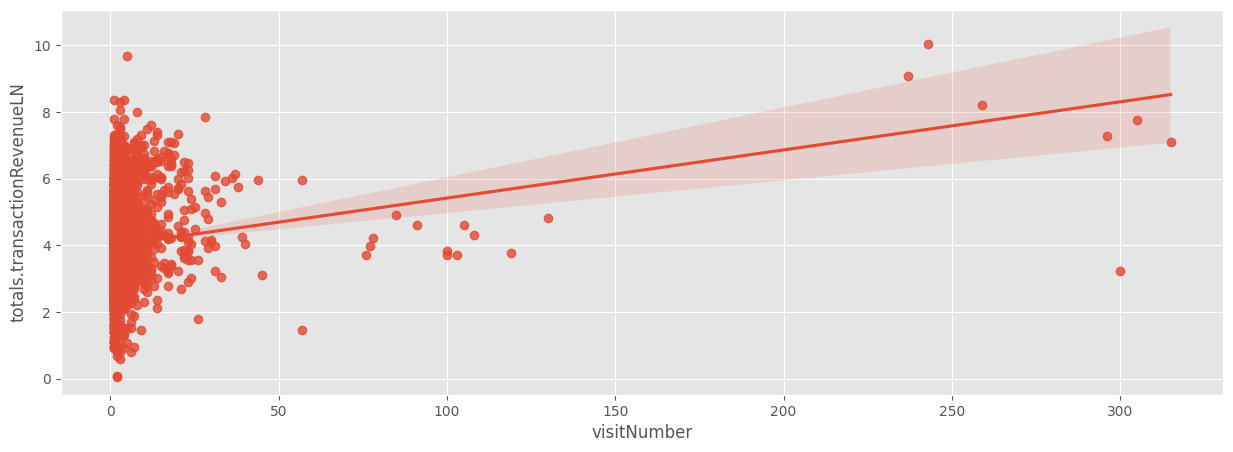

In [ ]:
plt.figure(figsize=(15,5))
sns.regplot(
    data=df[df['visitWithTransaction'] == 1],
    x='visitNumber',
    y=TARGET_LN
)

In [ ]:
df[['visitNumber', TARGET_LN]].corr()

,visitNumber,totals.transactionRevenueLN
visitNumber,1.000000,0.034522
totals.transactionRevenueLN,0.034522,1.000000


In [ ]:
#deteccion y correccion de outliers

In [ ]:
df['visitNumberLN'] = df['visitNumber'].apply(lambda x: np.log1p(x))

<Axes: xlabel='visitNumberLN', ylabel='totals.transactionRevenueLN'>

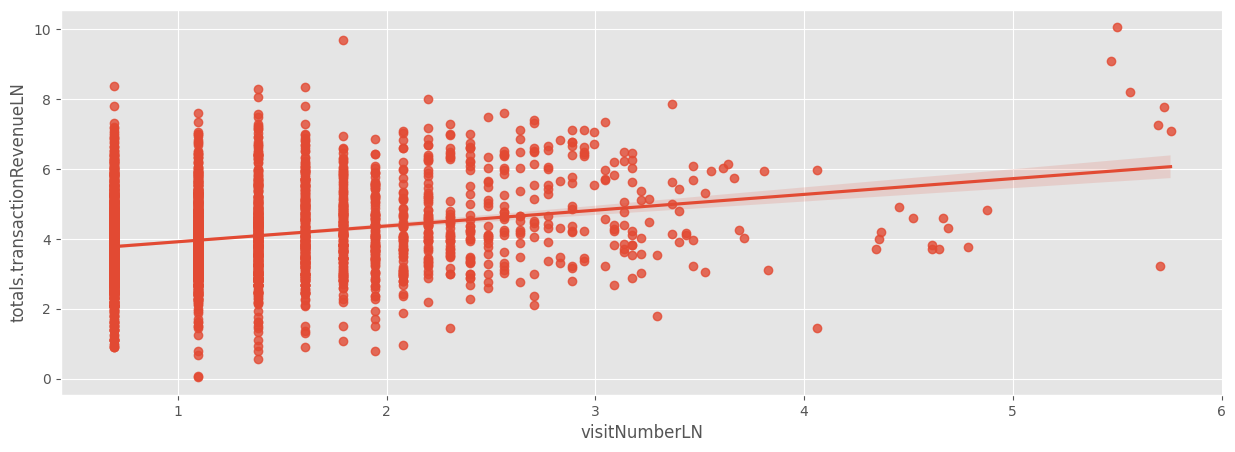

In [ ]:
plt.figure(figsize=(15,5))
sns.regplot(
    data=df[df['visitWithTransaction'] == 1],
    x='visitNumberLN',
    y=TARGET_LN
)

In [ ]:
#mirar method corr
df[['visitNumberLN', TARGET_LN]].corr()

,visitNumberLN,totals.transactionRevenueLN
visitNumberLN,1.00000,0.09566
totals.transactionRevenueLN,0.09566,1.00000


In [ ]:
df[['visitNumberLN', TARGET_LN]].corr(method = 'pearson')

,visitNumberLN,totals.transactionRevenueLN
visitNumberLN,1.00000,0.09566
totals.transactionRevenueLN,0.09566,1.00000


In [ ]:
df[['visitNumber', TARGET]].corr(method = 'pearson')

,visitNumber,totals.transactionRevenue
visitNumber,1.000000,0.071906
totals.transactionRevenue,0.071906,1.000000


#### Final DataFrame

In [ ]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
visitNumber,270850.0,2.243275,8.912507,1.000000,1.000000,1.000000,1.000000,393.000000
device.isMobile,270850.0,0.264242,0.440930,0.000000,0.000000,0.000000,1.000000,1.000000
totals.bounces,135326.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
totals.newVisits,210508.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
totals.transactionRevenue,270850.0,1.749045,65.374181,0.000000,0.000000,0.000000,0.000000,23129.500000
visitWithTransaction,270850.0,0.012653,0.111771,0.000000,0.000000,0.000000,0.000000,1.000000
totals.transactionRevenueLN,270850.0,0.051013,0.469607,0.000000,0.000000,0.000000,0.000000,10.048907
network_net,270850.0,0.285977,0.451880,0.000000,0.000000,0.000000,1.000000,1.000000
network_com,270850.0,0.157774,0.364529,0.000000,0.000000,0.000000,0.000000,1.000000
visitHour,270850.0,12.522522,6.824870,0.000000,7.000000,14.000000,18.000000,23.000000


In [ ]:
df.describe(exclude=np.number).T

,count,unique,top,freq
channelGrouping,270850,8,Organic Search,114313
sessionId,270850,270774,4491333099755680268_1476946205,2
device.browser,270850,6,Chrome,186001
device.deviceCategory,270850,3,desktop,199269
geoNetwork.continent,270850,6,Americas,134742
geoNetwork.subContinent,270850,23,Northern America,116667
geoNetwork.country,270850,11,Others,231268
geoNetwork.networkDomain,270850,11,Others,124163


In [ ]:
#pasamos bounces y new visits a categoricas

In [ ]:
df = df.astype({'totals.newVisits': 'category','totals.bounces': 'category'}).copy()

In [ ]:
df.drop('sessionId', axis = 1, inplace = True)

## 3 Data preparation

In [ ]:
def OHE(dataframe, column_name):
    _dummy_dataset = pd.get_dummies(dataframe[column_name], prefix=column_name)
    dataframe = pd.concat([dataframe, _dummy_dataset], axis=1)
    return dataframe.drop(column_name, axis=1)

In [ ]:
for column in df.select_dtypes(exclude=np.number).columns:
    df = OHE(df, column)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270850 entries, 0 to 270849
Data columns (total 83 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   visitNumber                                   270850 non-null  int64  
 1   device.isMobile                               270850 non-null  int64  
 2   totals.transactionRevenue                     270850 non-null  float64
 3   visitWithTransaction                          270850 non-null  int64  
 4   totals.transactionRevenueLN                   270850 non-null  float64
 5   network_net                                   270850 non-null  int64  
 6   network_com                                   270850 non-null  int64  
 7   visitHour                                     270850 non-null  int64  
 8   year                                          270850 non-null  int64  
 9   month                                         27

In [ ]:
df.describe(include=np.number).T.head(20)

,count,mean,std,min,25%,50%,75%,max
visitNumber,270850.0,2.243275,8.912507,1.000000,1.000000,1.000000,1.000000,393.000000
device.isMobile,270850.0,0.264242,0.440930,0.000000,0.000000,0.000000,1.000000,1.000000
totals.transactionRevenue,270850.0,1.749045,65.374181,0.000000,0.000000,0.000000,0.000000,23129.500000
visitWithTransaction,270850.0,0.012653,0.111771,0.000000,0.000000,0.000000,0.000000,1.000000
totals.transactionRevenueLN,270850.0,0.051013,0.469607,0.000000,0.000000,0.000000,0.000000,10.048907
network_net,270850.0,0.285977,0.451880,0.000000,0.000000,0.000000,1.000000,1.000000
network_com,270850.0,0.157774,0.364529,0.000000,0.000000,0.000000,0.000000,1.000000
visitHour,270850.0,12.522522,6.824870,0.000000,7.000000,14.000000,18.000000,23.000000
year,270850.0,2016.517212,0.499705,2016.000000,2016.000000,2017.000000,2017.000000,2017.000000
month,270850.0,6.991593,3.490611,1.000000,4.000000,7.000000,10.000000,12.000000


In [ ]:
########## 21.00

## 4. Modelling

### Data preparation para algoritmos específicos

In [ ]:
target_linked_features = ['totals.transactionRevenue', 'visitWithTransaction']

In [ ]:
df.drop(target_linked_features, axis=1, inplace=True)

Hay que eliminar las variables extras que no estan transformadas, si queremos utlizar la regression lineal:


*  visitNumberCorregida
*  totals.visitNumber




In [ ]:
non_normal_attributes = ['visitNumber_corregida', 'visitNumber']

In [ ]:
df.drop(non_normal_attributes, axis=1, inplace=True)

### Estrategia de validación

In [ ]:
df.pivot_table(index=['year', 'month'], values=TARGET_LN, aggfunc=len)

totals.transactionRevenueLN
year month                             
2016 8                            22082
     9                            21345
     10                           29282
     11                           33896
     12                           24158
2017 1                            19470
     2                            18854
     3                            20828
     4                            19899
     5                            19585
     6                            18954
     7                            21543
     8                              954

In [ ]:
df_val = df[df['year'] * 100 + df['month'] >= 201706]
df_dev = df[df['year'] * 100 + df['month'] < 201706]

In [ ]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41451 entries, 1445 to 270113
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   device.isMobile                               41451 non-null  int64  
 1   totals.transactionRevenueLN                   41451 non-null  float64
 2   network_net                                   41451 non-null  int64  
 3   network_com                                   41451 non-null  int64  
 4   visitHour                                     41451 non-null  int64  
 5   year                                          41451 non-null  int64  
 6   month                                         41451 non-null  int64  
 7   day                                           41451 non-null  int64  
 8   visitNumberLN                                 41451 non-null  float64
 9   channelGrouping_(Other)                       41451 non-null  

In [ ]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229399 entries, 0 to 270849
Data columns (total 79 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   device.isMobile                               229399 non-null  int64  
 1   totals.transactionRevenueLN                   229399 non-null  float64
 2   network_net                                   229399 non-null  int64  
 3   network_com                                   229399 non-null  int64  
 4   visitHour                                     229399 non-null  int64  
 5   year                                          229399 non-null  int64  
 6   month                                         229399 non-null  int64  
 7   day                                           229399 non-null  int64  
 8   visitNumberLN                                 229399 non-null  float64
 9   channelGrouping_(Other)                       229399 

### Fitting and evaluation

In [ ]:
#fiting paso a paso

In [ ]:
# separar target y atributos

In [ ]:
dev_X_modelo1 =df_dev.drop('totals.transactionRevenueLN',axis = 1)
dev_y_modelo1 =df_dev['totals.transactionRevenueLN']
val_X_modelo1 =df_val.drop('totals.transactionRevenueLN',axis = 1)
val_y_modelo1  = df_val['totals.transactionRevenueLN']

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = model_selection.train_test_split(dev_X_modelo1,dev_y_modelo1,test_size = .2, random_state = 42)

In [ ]:
model1_rf = RandomForestRegressor(n_estimators=50, max_depth=6, random_state=42)

In [ ]:
model1_rf.fit(X_train_1,y_train_1)

RandomForestRegressor(max_depth=6, n_estimators=50, random_state=42)

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
dot_data = export_graphviz(
    decision_tree = model1_rf[0],
    out_file=None,
    feature_names=X_train_1.columns,
    #class_names=['No delay', 'Delay'],
    filled=True,
    impurity=True,
    proportion=True,
    rotate=True,
    rounded=True
)

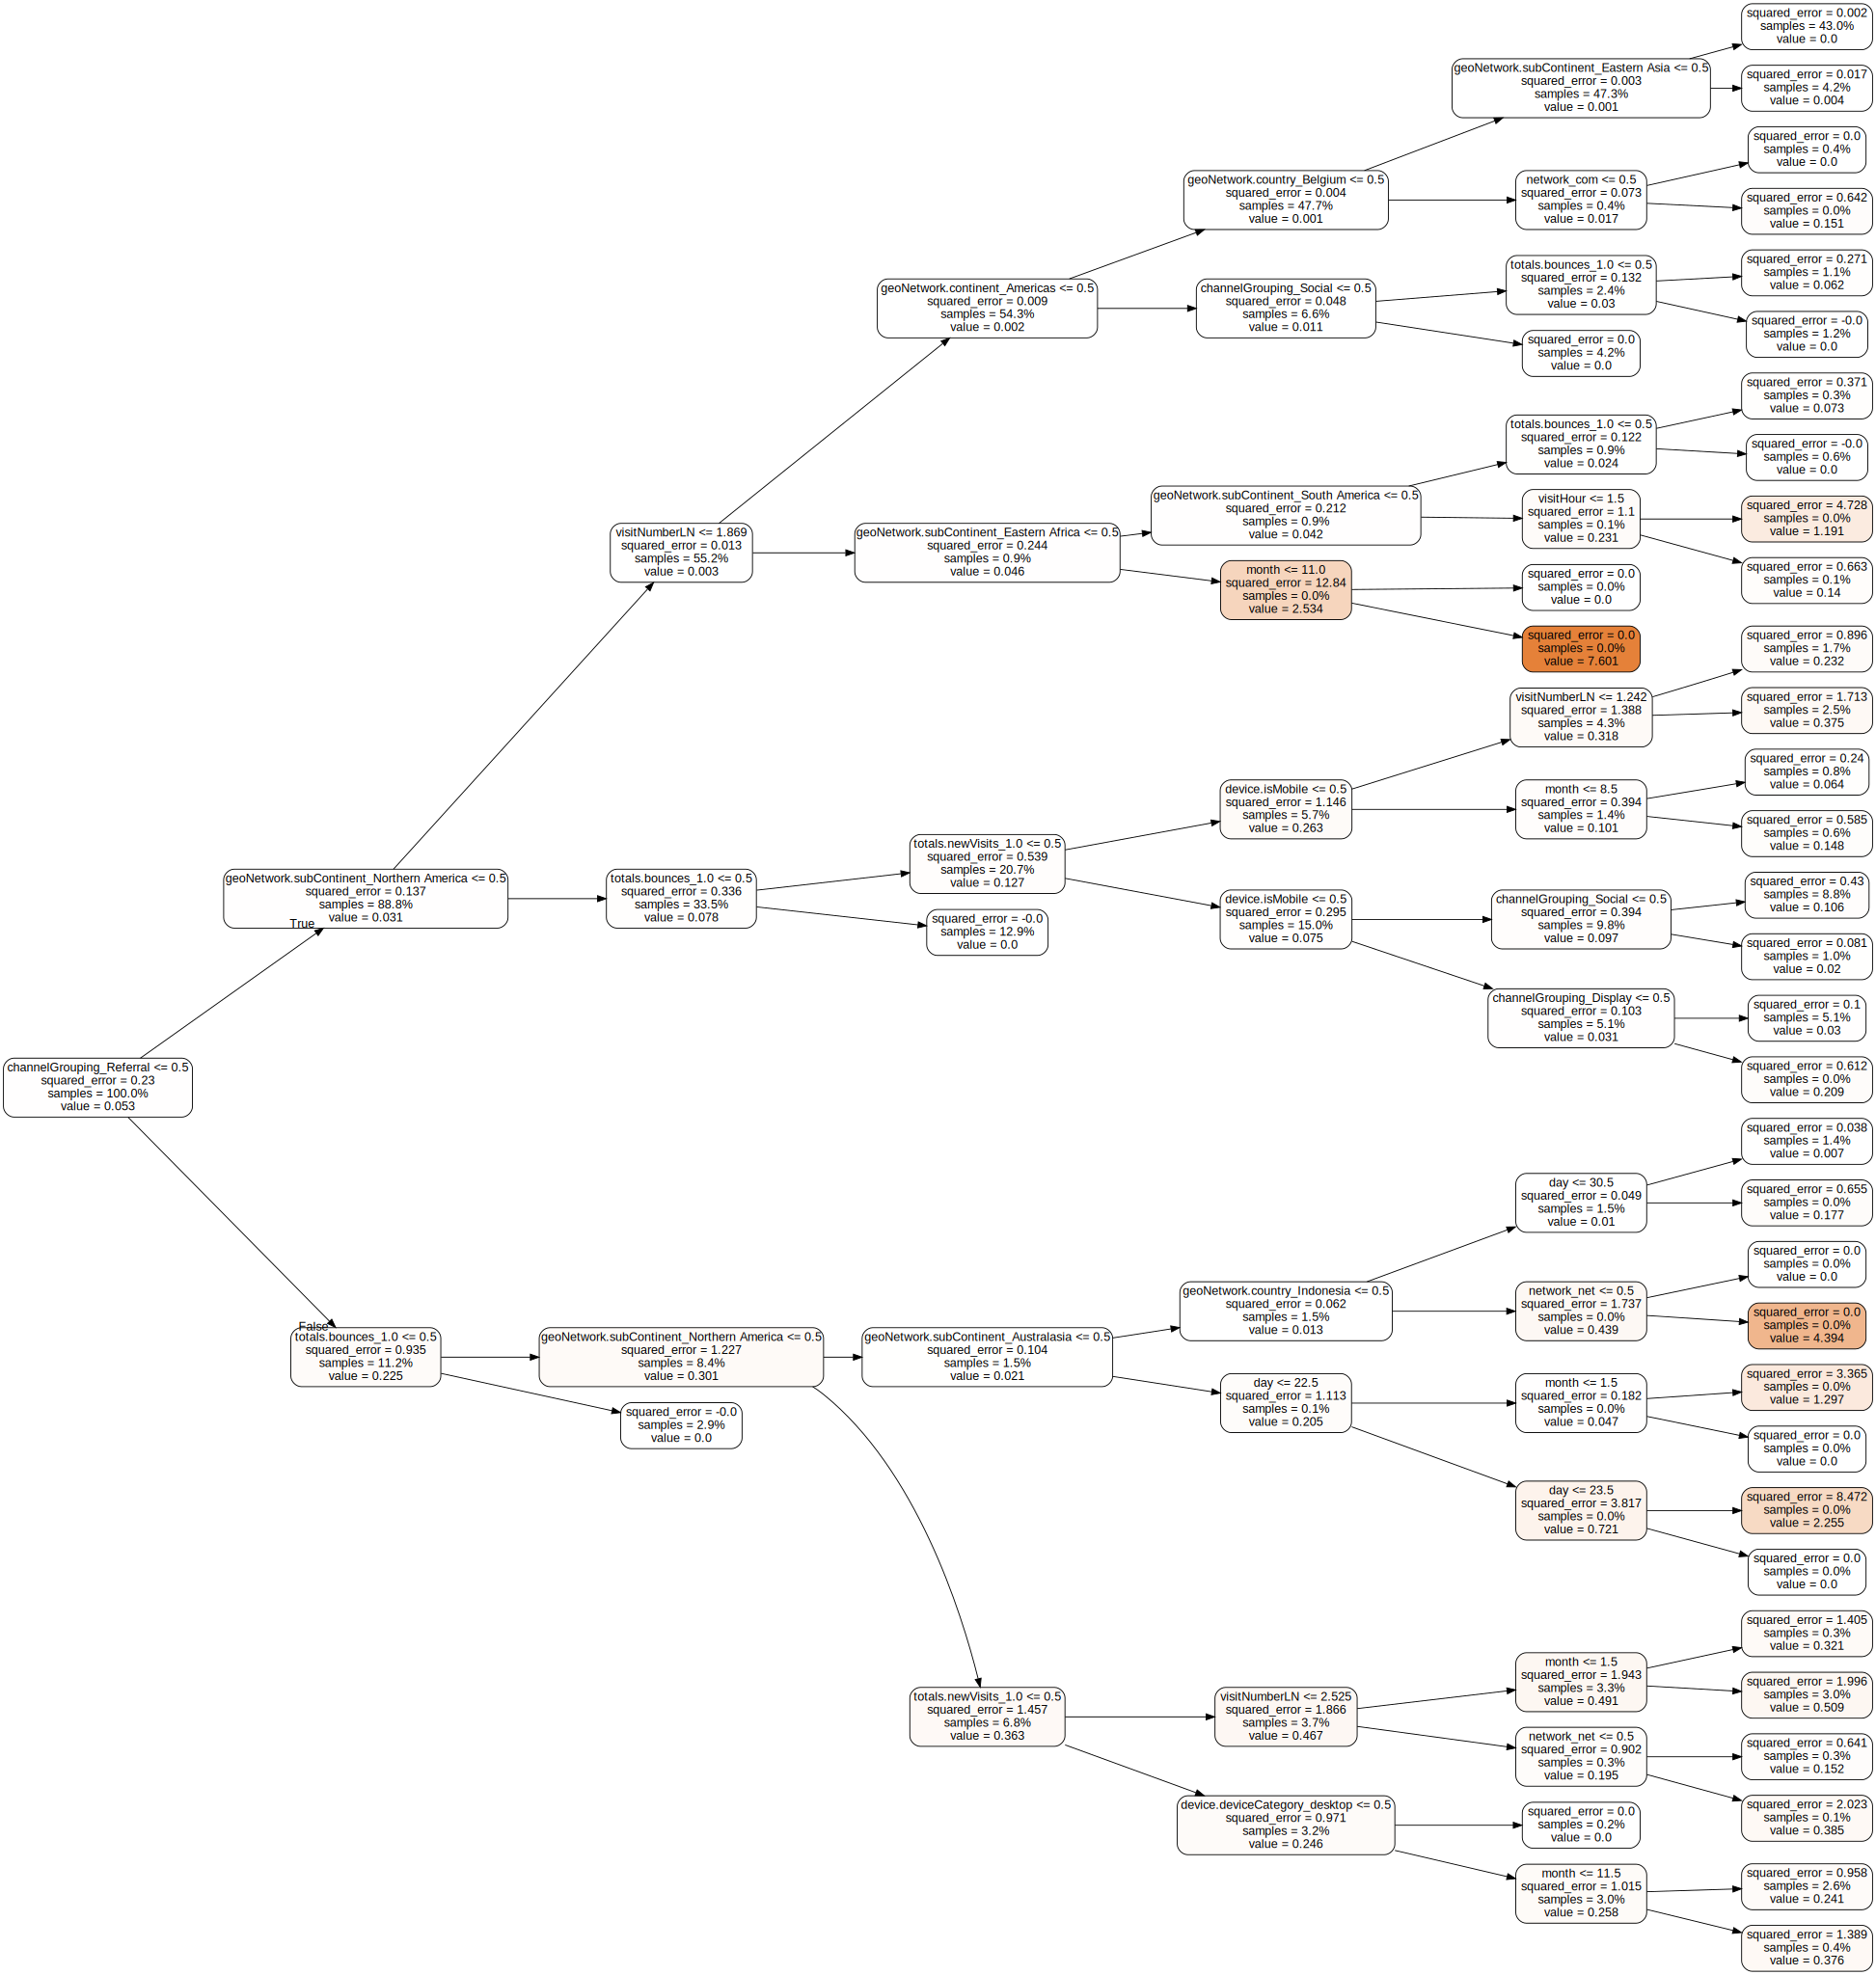

In [ ]:
import graphviz
graphviz.Source(dot_data)

In [ ]:
top_features = pd.Series(model1_rf.feature_importances_.round(3), index=X_train_1.columns).sort_values(ascending=False).head(20)

In [ ]:
#basado en train
#sobreestima la importancia de variables numericas porque los cortes estan mas overfiteados

In [ ]:
top_features

totals.bounces_1.0                          0.220
geoNetwork.subContinent_Northern America    0.188
channelGrouping_Referral                    0.175
totals.newVisits_1.0                        0.131
visitNumberLN                               0.112
device.deviceCategory_desktop               0.033
device.isMobile                             0.027
day                                         0.024
visitHour                                   0.018
month                                       0.017
channelGrouping_Direct                      0.008
geoNetwork.networkDomain_verizon.net        0.006
geoNetwork.country_Indonesia                0.005
network_net                                 0.003
geoNetwork.subContinent_Eastern Africa      0.003
geoNetwork.networkDomain_unknown.unknown    0.003
channelGrouping_Organic Search              0.003
geoNetwork.subContinent_South America       0.002
geoNetwork.subContinent_Northern Europe     0.002
channelGrouping_Social                      0.002


In [ ]:
###ojo revisar total bounces

In [ ]:
# fin clase 6

In [ ]:
top_features = pd.Series(model1_rf.feature_importances_, index=X_train_1.columns).sort_values(ascending=False).head(20)

<Axes: >

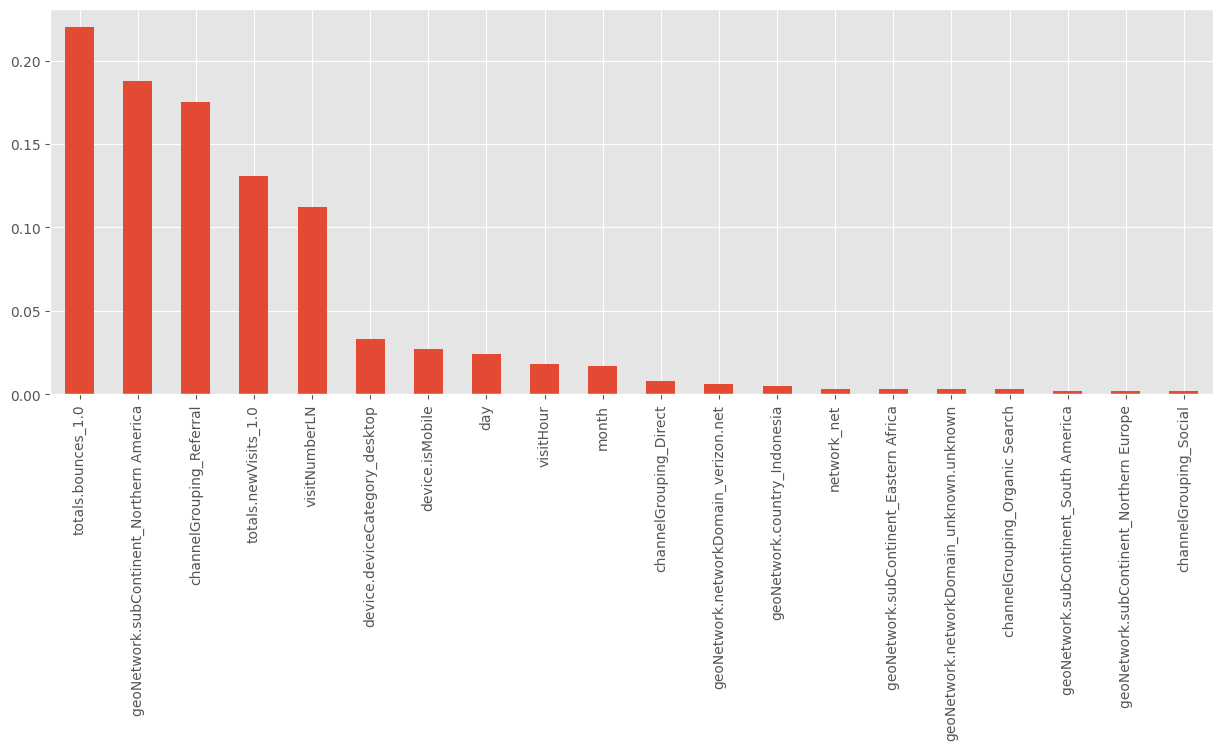

In [ ]:
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

In [ ]:
predictions_rf1 = model1_rf.predict(X_test_1)

In [ ]:
test_predictions_rf1 = pd.DataFrame(predictions_rf1, columns=[str('Prediction-'+ 'RF')], index=X_test_1.index)

In [ ]:
results_df_rf1 = pd.DataFrame(y_test_1).copy()

In [ ]:
results_df_rf1.columns = ['Target']

In [ ]:
results_df_rf1 = results_df_rf1.join(test_predictions_rf1)

In [ ]:
results_df_rf1.sort_values(by='Target', ascending=False).head(5)

,Target,Prediction-RF
221895,7.783516,0.515439
38033,7.556428,0.318849
237413,7.349347,0.274286
108633,7.329212,0.344525
68764,7.312887,0.124731


In [ ]:
results_df_rf1[str('error-'+ 'RF')] = results_df_rf1['Target'] - results_df_rf1[str('Prediction-'+ 'RF')]
results_df_rf1[str('squared_error-'+ 'RF')] = results_df_rf1[str('error-'+ 'RF')] ** 2
results_df_rf1[str('rooted_squared_error-'+ 'RF')] = np.sqrt(results_df_rf1[str('squared_error-'+ 'RF')])

In [ ]:
mse_rf1 = metrics.mean_squared_error(y_test_1, predictions_rf1)
mse_val_rf1 = metrics.mean_squared_error(df_val_y, model1_rf.predict(df_val_X))
print('MSE for {}: test - {}, validación - {}'.format('RF', np.round(mse_rf1,4), np.round(mse_val_rf1,4)))

MSE for RF: test - 0.2093, validación - 0.2257


In [ ]:
#comparacion con el moelo tonto, siempre predice 0

In [ ]:
zero_data = np.zeros(shape=(len(y_test_1),1))

In [ ]:
metrics.mean_squared_error(y_test_1, zero_data)

0.2238344758990539

<Axes: xlabel='rooted_squared_error-RF', ylabel='Count'>

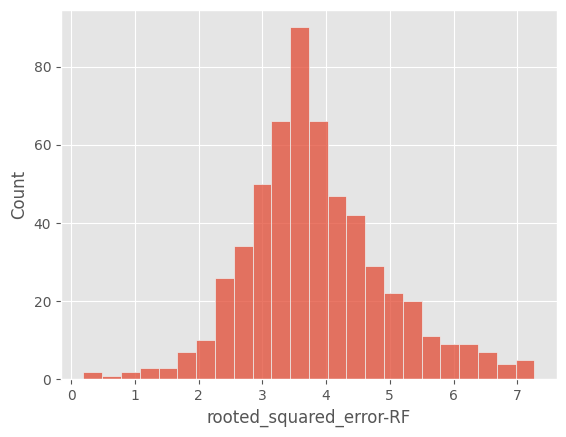

In [ ]:
sns.histplot(data = results_df_rf1[results_df_rf1['Target'] > 0], x = str('rooted_squared_error-'+ 'RF'))
#distribucion del error

<Axes: xlabel='Target', ylabel='Count'>

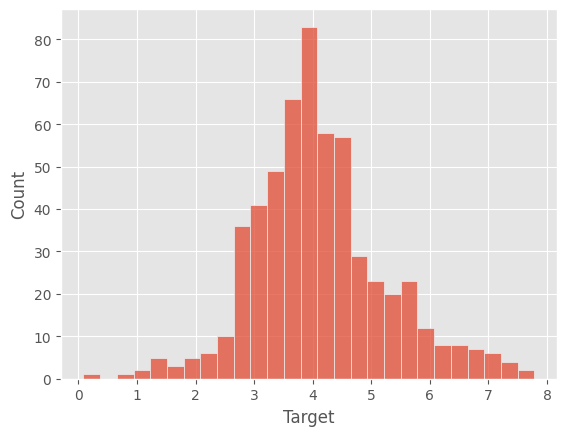

In [ ]:
sns.histplot(data = results_df_rf1[results_df_rf1['Target'] > 0], x = 'Target')
#distribucion del target

In [ ]:
##extra

In [ ]:
#import guillemtoolkitml

In [ ]:
guillemtoolkitml.explore_cat_values(df, 'channelGrouping_Direct', TARGET_LOG)

,n_rows,pct_rows,transactions,pct_transactions,mean_revenue
channelGrouping_Direct,,,,,
0,228104,0.842178,2843,0.012464,3.970797
1,42746,0.157822,584,0.013662,4.328821


In [ ]:
##############################

In [ ]:
#funcion para hacer multiples fittings a la vez

In [ ]:
models = [('DecisionTree', DecisionTreeRegressor(max_depth=3, random_state=42)),
            ('RandomForest', RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)),
            ('GradientBoosting', xgb.XGBRegressor(n_estimators=100, max_depth=3, random_state=42)),
            ('LinearRegression', LinearRegression())
            ]

In [ ]:
def AutoModelling(dev_DataFrame,val_DataFrame,target_var,test_size_prop,models):

  dev_DataFrame_x=dev_DataFrame.drop(target_var,axis = 1)
  dev_DataFrame_y=dev_DataFrame[target_var]
  val_DataFrame_x=val_DataFrame.drop(target_var,axis = 1)
  val_DataFrame_y = val_DataFrame[target_var]

  X_train, X_test, y_train, y_test = model_selection.train_test_split(
    dev_DataFrame_x,
    dev_DataFrame_y,
    test_size = test_size_prop, #20% del development se va a test, 80% en train
    random_state = 42)


  # create base table with real target
  results_df = pd.DataFrame(y_test).copy()
  results_df.columns = ['Target']


  for model in models:
    model_name = model[0]
    model_instance = model[1]
    model_instance.fit(X_train, y_train)
    predictions = model_instance.predict(X_test)
    test_predictions = pd.DataFrame(predictions, columns=[str('Prediction-'+ model[0])], index=X_test.index)
    results_df = results_df.join(test_predictions)
    results_df[str('error-'+ model[0])] = results_df['Target'] - results_df[str('Prediction-'+ model[0])]
    results_df[str('squared_error-'+ model[0])] = results_df[str('error-'+ model[0])] ** 2
    results_df[str('rooted_squared_error-'+ model[0])] = np.sqrt(results_df[str('squared_error-'+ model[0])])
    mse_train = metrics.mean_squared_error(y_train, model_instance.predict(X_train))
    mse = metrics.mean_squared_error(y_test, predictions)
    mse_val = metrics.mean_squared_error(val_DataFrame_y, model_instance.predict(val_DataFrame_x))
    print('MSE for {}: train - {} test - {}, validación - {}'.format(model_name, np.round(mse_train,4), np.round(mse,4), np.round(mse_val,4)))
  return results_df

In [ ]:
def KPIs_modelo(df_resultados, sq_error_var = 'squared_error',rooted_sql_error_var = 'rooted_squared_error'):
  mse = df_resultados[sq_error_var].mean()
  rmse = df_resultados[rooted_sql_error_var].mean()
  mse_modelo_tonto = (df_resultados['Target'] **2).mean()
  print('MSE tonto: {} - MSE: {} - RMSE: {}'.format(mse_modelo_tonto, mse, rmse))

In [ ]:
resultados_modelos = AutoModelling(df_dev,df_val,'totals.transactionRevenueLN',0.2,models)

MSE for DecisionTree: train - 0.2078 test - 0.2127, validación - 0.2296
MSE for RandomForest: train - 0.2062 test - 0.211, validación - 0.2277
MSE for GradientBoosting: train - 0.2013 test - 0.209, validación - 0.2256
MSE for LinearRegression: train - 0.2086 test - 0.2136, validación - 0.2309


In [ ]:
resultados_modelos.sort_values(by='Target', ascending=False).head(5)

,Target,Prediction-DecisionTree,error-DecisionTree,squared_error-DecisionTree,rooted_squared_error-DecisionTree,Prediction-RandomForest,error-RandomForest,squared_error-RandomForest,rooted_squared_error-RandomForest,Prediction-GradientBoosting,error-GradientBoosting,squared_error-GradientBoosting,rooted_squared_error-GradientBoosting,Prediction-LinearRegression,error-LinearRegression,squared_error-LinearRegression,rooted_squared_error-LinearRegression
221895,7.783516,0.398840,7.384676,54.533439,7.384676,0.369247,7.414269,54.971386,7.414269,0.468375,7.315140,53.511277,7.315140,0.291038,7.492478,56.137221,7.492478
38033,7.556428,0.122915,7.433513,55.257117,7.433513,0.211741,7.344687,53.944429,7.344687,0.395562,7.160866,51.278008,7.160866,0.200939,7.355489,54.103222,7.355489
237413,7.349347,0.122915,7.226432,52.221315,7.226432,0.208972,7.140375,50.984951,7.140375,0.232328,7.117019,50.651952,7.117019,0.153156,7.196191,51.785162,7.196191
108633,7.329212,0.122915,7.206297,51.930716,7.206297,0.211741,7.117471,50.658393,7.117471,0.759463,6.569749,43.161600,6.569749,0.212666,7.116546,50.645224,7.116546
68764,7.312887,0.122915,7.189972,51.695699,7.189972,0.110962,7.201925,51.867726,7.201925,0.117326,7.195561,51.776102,7.195561,0.109876,7.203011,51.883372,7.203011


In [ ]:
def plot_results_prediction(dataframe_resultados,rooted_sql_error_var = 'rooted_squared_error'):
  fig, axes = plt.subplots(2,1, figsize=(15, 5), sharex=True)
  fig.suptitle('Error maginitude of the model')

  # Model
  sns.histplot(data = dataframe_resultados[dataframe_resultados['Target'] > 0], x = rooted_sql_error_var,ax= axes[0])
  axes[0].set_title('Model error distribution')

  # Target
  sns.histplot(data = dataframe_resultados[dataframe_resultados['Target'] > 0], x = 'Target',ax= axes[1])
  axes[1].set_title('Target distribution')
  plt.show()

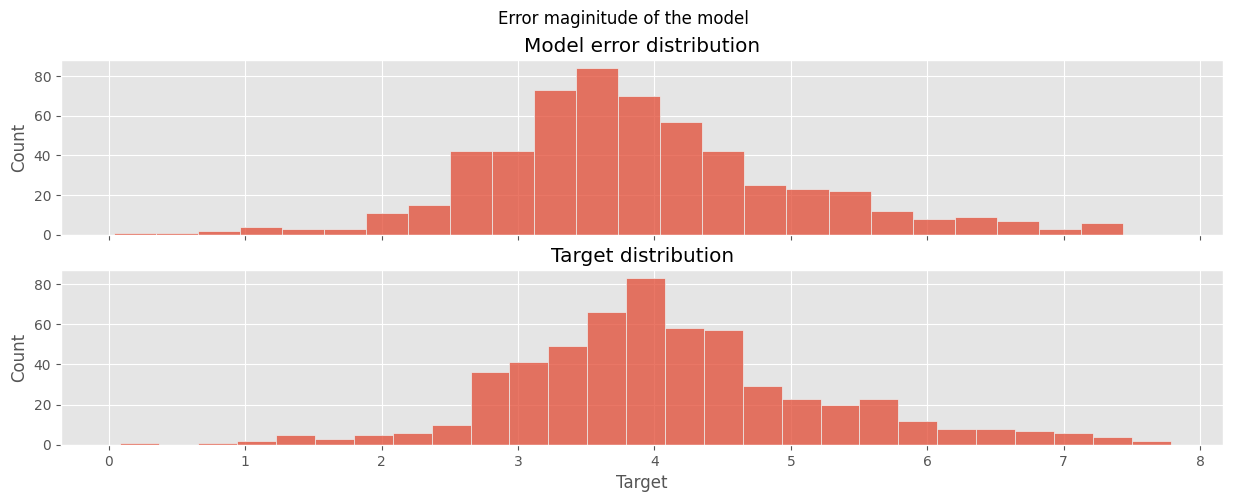

In [ ]:
plot_results_prediction(resultados_modelos,'rooted_squared_error-DecisionTree')

### Rebalanceo del dataframe

Aplicaremos la técnica de undersampling que consiste en mantener el mismo número de registros de la clase minoritaria y disminuir el número de registros de la clase mayoritaria.

In [ ]:
df_dev_zero = df_dev[df_dev[TARGET_LN] == 0]

In [ ]:
df_dev_nonzero = df_dev[df_dev[TARGET_LN] > 0]

In [ ]:
df_dev_zero.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 226569 entries, 0 to 270849
Columns: 79 entries, device.isMobile to totals.newVisits_1.0
dtypes: bool(70), float64(2), int64(7)
memory usage: 32.4 MB


In [ ]:
df_dev_nonzero.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 2830 entries, 259 to 270745
Columns: 79 entries, device.isMobile to totals.newVisits_1.0
dtypes: bool(70), float64(2), int64(7)
memory usage: 414.6 KB


In [ ]:
proporcion = 0.2

In [ ]:
n_nonzeros = int(len(df_dev_nonzero) * (1/proporcion - 1))

In [ ]:
n_nonzeros

11320

In [ ]:
df_dev_zero_sample = df_dev_zero.sample(n = n_nonzeros, random_state = 42)

In [ ]:
df_dev_sample = pd.concat([df_dev_nonzero, df_dev_zero_sample])

In [ ]:
df_dev_sample.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 14150 entries, 259 to 177026
Columns: 79 entries, device.isMobile to totals.newVisits_1.0
dtypes: bool(70), float64(2), int64(7)
memory usage: 2.0 MB


In [ ]:
resultados_modelos_resampled = AutoModelling(df_dev_sample,df_val,'totals.transactionRevenueLN',0.2,models)

MSE for DecisionTree: train - 1.8278 test - 1.8873, validación - 1.0694
MSE for RandomForest: train - 1.8243 test - 1.8868, validación - 1.0646
MSE for GradientBoosting: train - 1.5098 test - 1.8009, validación - 1.0888
MSE for LinearRegression: train - 1.915 test - 1.993, validación - 1.5768146691114704e+16


In [ ]:
resultados_modelos_resampled.sort_values(by='Target', ascending=False).head(5)

,Target,Prediction-DecisionTree,error-DecisionTree,squared_error-DecisionTree,rooted_squared_error-DecisionTree,Prediction-RandomForest,error-RandomForest,squared_error-RandomForest,rooted_squared_error-RandomForest,Prediction-GradientBoosting,error-GradientBoosting,squared_error-GradientBoosting,rooted_squared_error-GradientBoosting,Prediction-LinearRegression,error-LinearRegression,squared_error-LinearRegression,rooted_squared_error-LinearRegression
267201,9.068642,2.691596,6.377046,40.666711,6.377046,2.689064,6.379578,40.699014,6.379578,3.504442,5.564200,30.960319,5.564200,2.111801,6.956841,48.397635,6.956841
113889,7.601202,0.834771,6.766431,45.784589,6.766431,0.616898,6.984304,48.780504,6.984304,1.505861,6.095341,37.153184,6.095341,1.803703,5.797499,33.610996,5.797499
263374,7.300223,2.691596,4.608627,21.239439,4.608627,2.689064,4.611159,21.262786,4.611159,4.315400,2.984823,8.909167,2.984823,2.396828,4.903395,24.043285,4.903395
68796,7.209118,2.691596,4.517522,20.408005,4.517522,2.689064,4.520054,20.430890,4.520054,2.976420,4.232698,17.915736,4.232698,2.660248,4.548871,20.692223,4.548871
180987,7.137159,2.691596,4.445563,19.763029,4.445563,2.689064,4.448095,19.785550,4.448095,3.258318,3.878841,15.045409,3.878841,2.684982,4.452177,19.821879,4.452177


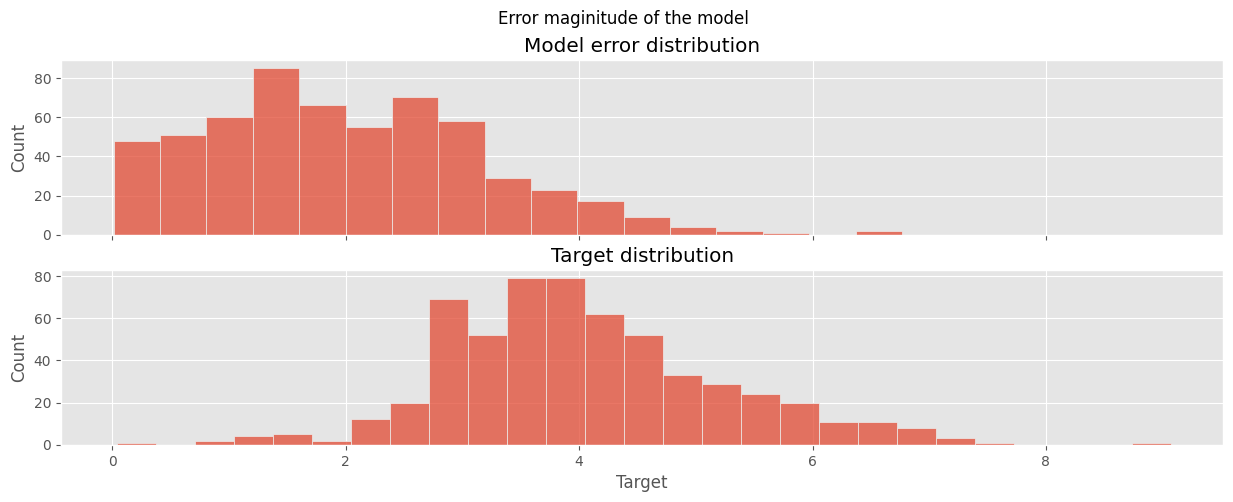

In [ ]:
plot_results_prediction(resultados_modelos_resampled,'rooted_squared_error-DecisionTree')

Conclusiones:
El undersampling nos ayuda a predecir mejor las compras de alto importe. Sin embargo, debido a la poca cantidad de datos, reducimos demasiado el dataset. En consecuencia, el algoritmo tiene menos información de la que aprender y, en global, da resultados peores a la versión no rebalanceada.